In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:
airdata = pd.read_csv('../../data/airdata_2022062410.csv', delimiter=',')
station = pd.read_csv('../../data/station_info.csv', delimiter=',')

In [9]:
aqi = airdata['AQI']

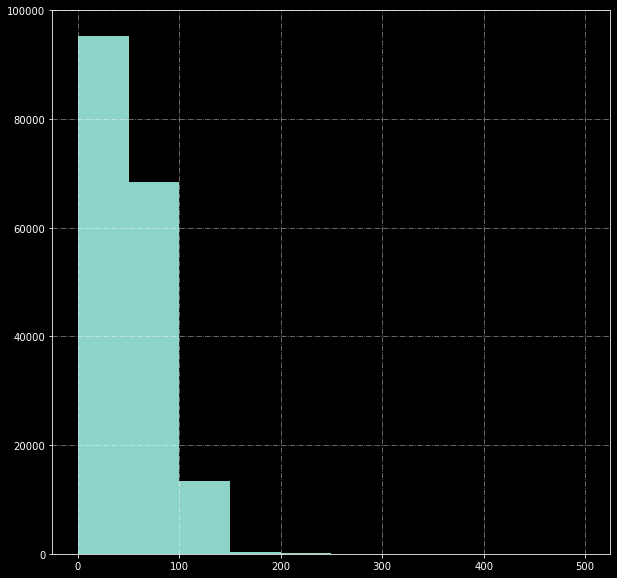

In [11]:
figure(figsize=(10,10))
x = airdata['AQI']
n,bins,patchs = plt.hist(x,bins=10)
plt.grid(alpha=0.5,linestyle='-.')
plt.xlim = (0,500)
plt.show()



In [14]:
n.tolist()

[95245.0, 68491.0, 13430.0, 384.0, 64.0, 30.0, 15.0, 3.0, 6.0, 54.0]

In [48]:
sta_pol = {}

In [50]:
for i in airdata.index:
    s = airdata.iloc[i]
    if  s['C_dqbID'] not in sta_pol.keys():
        sta_pol[s['C_dqbID']] = [s['AQI']]
    else: sta_pol[s['C_dqbID']].append(s['AQI'])

In [64]:
nan_sta = []

In [65]:
for sta in sta_pol.keys():
    for i in range(len(sta_pol[sta])):
        if np.isnan(sta_pol[sta][i]):
            nan_sta.append(sta)
            break

In [67]:
len(nan_sta)

44

In [24]:
pol_sta = []

In [25]:
for i in airdata.index:
    s = airdata.iloc[i]
    if float(s['AQI']) > 200 and s['C_dqbID'] not in pol_sta:
        pol_sta.append(s['C_dqbID'])

In [29]:
from pyecharts.charts import Geo 
from pyecharts import options
from pyecharts.globals import GeoType
import pandas as pd

In [40]:
g = Geo().add_schema(maptype="江苏")

for i in station.index:
    s = station.iloc[i]
    if s['C_dqbID'] in pol_sta:
        g.add_coordinate(s['C_dqbID'],s['C_LOD'],s['C_LAD'])

# data_pair = [(station.iloc[i]['C_dqbID'],1) for i in station.index]
data_pair = [(pol_sta[i],1) for i in range(49)]

g.add('',data_pair, type_=GeoType.EFFECT_SCATTER, symbol_size=2)
g.set_series_opts(label_opts=options.LabelOpts(is_show=False))
g.set_global_opts(title_opts=options.TitleOpts(title="中重度污染站点分布"))

g.render_notebook()

In [41]:
result = g.render('mhpol_stations.html')

In [37]:
hpol_sta = []

In [38]:
for i in airdata.index:
    s = airdata.iloc[i]
    if float(s['AQI']) > 300 and s['C_dqbID'] not in hpol_sta:
        hpol_sta.append(s['C_dqbID'])

In [42]:
len(hpol_sta)

31

In [45]:
g = Geo().add_schema(maptype="江苏")

for i in station.index:
    s = station.iloc[i]
    if s['C_dqbID'] in hpol_sta:
        g.add_coordinate(s['C_dqbID'],s['C_LOD'],s['C_LAD'])

# data_pair = [(station.iloc[i]['C_dqbID'],1) for i in station.index]
data_pair = [(hpol_sta[i],1) for i in range(31)]

g.add('',data_pair, type_=GeoType.EFFECT_SCATTER, symbol_size=2)
g.set_series_opts(label_opts=options.LabelOpts(is_show=False))
g.set_global_opts(title_opts=options.TitleOpts(title="重度污染站点分布"))

g.render_notebook()

In [46]:
result = g.render('hpol_stations.html')